PostId: 2019-03-07-114649
Title:Elements of Information Theoryの九章〜

[Elements of Information Theoryの読書記録](https://karino2.github.io/2019/02/10/143600.html)

- [2章までのノート](https://karino2.github.io/2019/01/31/115955.html)
- [3章〜8章のノート](https://karino2.github.io/2019/02/10/144121.html)

という事で以下の本の9章から先を読んでいきます。

<iframe style="width:120px;height:240px;" marginwidth="0" marginheight="0" scrolling="no" frameborder="0" src="https://rcm-fe.amazon-adsystem.com/e/cm?ref=qf_sp_asin_til&t=karino203-22&m=amazon&o=9&p=8&l=as1&IS1=1&detail=1&asins=B00HLG9ISQ&bc1=ffffff&lt1=_top&fc1=333333&lc1=0066c0&bg1=ffffff&f=ifr"> </iframe>

# 9章 ガウシアンチャンネル

興味が無いがつかう事もあるかもしれない、くらいのトピック。
結果だけ眺めておく、くらいで次に進みたい。

読み終わった。9.6のフィードバック有りは全く読んでない。
9.1〜9.3は軽く各定理の意味と証明のあらすじくらいは眺めた。
周波数成分で何が決まるか、とかは真面目にやると関数解析の世界の話題やね。

9.4以降は対象としてる問題設定と結論だけ見た、くらい。

このくらいでは全然理解出来てないが、先で必要になったらそのことに気づける程度にはなったと思うので必要になったら戻る。

# 10章 Rate distortion theory

実数を適当な離散値で近似した時に、どのくらい良く表現出来てるか、というのを扱う章らしい。

へぇ、これはなかなか面白そうなので真面目に読みたい。

### 10.2 問題設定

一つのアルファベットをRビットで表現する、とする。
するとRビットでは$$2^R$$個の数が表現出来る。

それをn個並べると、場合の数としては$$2^nR$$個という事になる。
エンコーダーはアルファベットのn個のシーケンスをこのどれかにマップする、と考える。

式10.6でn文字のdistortionを個々のdistortionの和としてるが、これだと一文字ずれると壊滅的な結果になっちゃうんだが、それは指標として微妙な気がするがどうなんだろう？

定義: $$(2^nR, n)$$-rate distortion codeとは、n個のアルファベットを$$2^nR$$までの整数のどれかにマップする関数$$f_n$$と、これらのどれかの数字から元の文字列を推測するデコーダー$$g_n$$の事。

定義: distortion Dとは、

$$D= E d(X^n, g_n(f_n(X^n)))$$

の事。EはXの分布に対して取る。

rate distortion pair R, Dがachievableとは、nを無限に飛ばした時の極限で、nのdistortionがD以下に収束する事。
極限なのね。

rate dsitortion regionはachievableな(R, D)の閉包だとか。うーん、閉包とかあんま覚えてないが。

R(D)はrate distortion functionと言われて、Dが与えられた時にrate distortion regionのRの下限。
感覚的にはDを与えた時にそれを達成出来るRの下限か。

D(R)はdistortion rate functionで、Rがgivenな時のDの下限か。ややこしい。

なおこの本では主にrate distortion functionの方を使うとか。

この章ではこのrate distortion functionが、XとXハットの相互情報量の最小値に等しい（10.11）というのがメインの内容らしい。

それにしてもこの下限を実現する時の分布での相互情報量というのは、非常にW-GANっぽいな。

## 10.3 rate distortion functionの具体例

簡単な分布で計算してみよう、という節。
こういう節はありがたいね。やっていこう。

### ベルヌーイ分布

ハミングdistortionでベルヌーイ分布の時を求める。

相互情報量を変形していく訳だが、10.16は少し考えた。
Xは二値なので、結局この丸プラスで分かっている物を足しても、不確実性は変化しない（元が完全に推測出来る）ので、10.16のようになるのだな。

次に引っかかるのは10.18の以下。

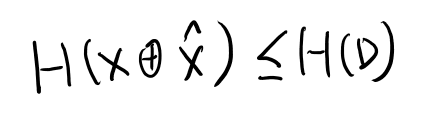

In [1]:
MeatPieImage()

そもそもDとはなんだったのかというと、associated distortionがdistortion measureの真の分布による期待値で、これの無限大での極限の最小の上限か。
うーん、この問題の場合nは1の時しか考えてないように見えるが…
良く分からないがn=1の時のassociated distortionの上限をDとしてるとしよう。

distortron measureはこの場合ハミングdistortionなので、等しければ0、異なれば1となる。これの期待値は、等しくない期待値、つまりエラー確率となる。

これで以下が言える。

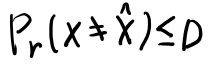

In [1]:
MeatPieImage()

さて、ここでH(D)とはなんぞや？
Dは上限なので確率変数じゃなさそう。
という事はベルヌーイ分布の時だけ定義したH(p)の定義の、pにDを入れた物か？つまり以下。

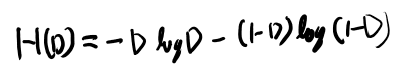

In [1]:
MeatPieImage()

うむ、そうっぽいな。さて、さきほど分からなかった10.18の以下を考える。

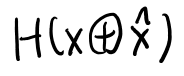

In [1]:
MeatPieImage()

このカッコの中は確率変数だよな。
するとエントロピーはそのprobability massで定義される。つまり以下か。

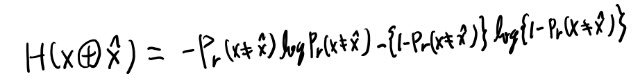

In [1]:
MeatPieImage()

H(p)は1/2以下では単調に増加するので、PrもDも1/2以下ならさきほど見たPrの不等式とH(p)の単調性からHの不等式が言えそう。

PrもDも1/2以下なのだろうか？

そもそもDは変数なので正の好きな値をとるよな。Dに対してRが決まる、という性質の物だ。

ただDが1/2よりも大きい場合というのは、Rを0に出来るので、場合分けして考えてる気がする。

一応1/2より大きい場合の補足。
pが既知のベルヌーイ分布でもっともエラーの低いXハットを考える。
少なくともいつも1-p側に全掛けしておけば、当たる確率は1/2以上だよな。
では外れるエラー確率の期待値は1/2以下か。これはRが0でも達成出来る。

だからDが1/2以下なのでは無くて、1/2以上の場合は別に答えが出るので、ここでは1/2以下の場合を考える、という事だな。

次にこのboundを達成するケースを考えてるが、これがトリッキーなので最初何を言ってるか全然分からなかった。

ここまではXを近似してXハットを出す問題だと思ってたが、ここでは単純にXという分布があった時に、それと相互情報量が特定の値のXハットを求めてるだけで、このXハットがXから出る、という事は前提としていない。
逆にXハットからXが出る。

これはエンコーダーとかデコーダーのような問題設定から離れて、相互情報量、という事だけを考えてるというのがポイントだ。
これがエンコーダーやデコーダーとどう関係してくるかはあとでわかるっぽいので、この時点では分からなくて良さそう。

この前提で考えると、なんかXハットというベルヌーイ分布があった時に、図10.3のようにXを決めれば、Xは指定された分布で、なおかつ相互情報量が下限の値となっている。

Xがあった時にどうXハットを求めるかはこの例では全然分からないが、相互情報量の下限は実際に達成出来る事はわかる。

一応10.3の相互情報量を計算しておくか。

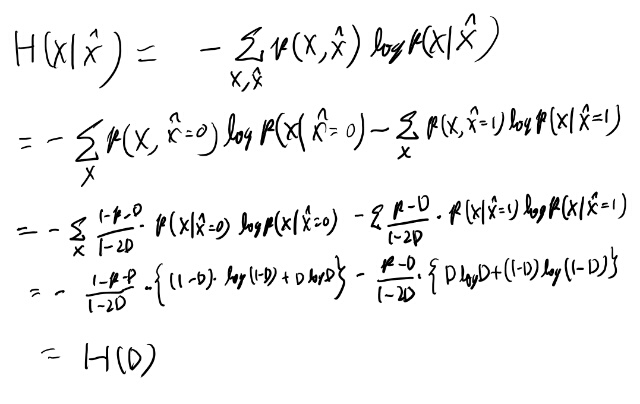

In [1]:
MeatPieImage()

まぁなってそう。

これではXからXハットを得る手段が無いので何をやってるかは全然分からない。
それが最後にunmotivatedに感じられるかもしれないが、、、と書いてある段落の意味だろう。
確かに意味が分からんが、定理10.2.1を証明すればわかるらしい。

### 10.3.2から10.4まで

10.3.2以降を読むとXからXハットを得る手段が無い事についてはより分かりやすい。
それぞれそれなりに内容はあるのだが、読むだけで理解は出来るのでメモをする必要はあまり無かった。

10.4は相互情報量で定義されたR(D)より小さいビットでは、Dよりdistortionの期待値を下げる事は出来ない、という証明。
これまたまぁまぁ重いのだが途中式が丁寧に書かれているので読むだけで分からない事は無い（結構辛かったが）

### 10.5 achievability

まずdistortion typicalという概念の定義がある。
これは以前あったjoint typicalにもうひとつ条件が加わったもの。

joint typicalはXとYがあった時、XとYがそれぞれtypicalで、なおかつp(x, y)もtypicalの不等式（つまり10.74）を満たす物、というのが定義。

そこにプラスして、distortion measureがdistortionの期待値のepsilon以内にある、という条件を足した物がdistortion typical。

### codebookの復習

codebookという単語の定義を忘れたので復習。7.27の次くらいに出てている。

メモしておこう。

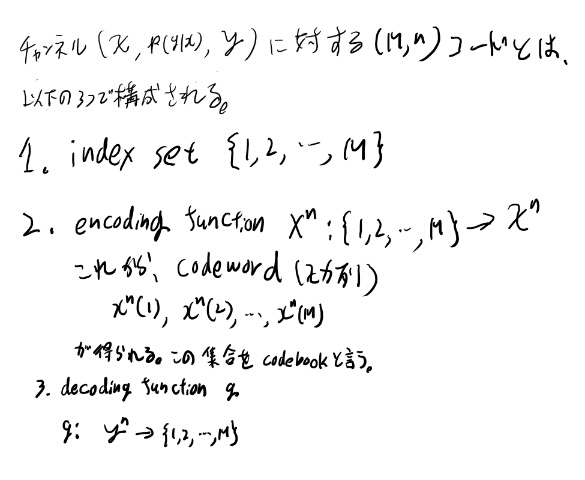

In [1]:
MeatPieImage()

つまり入力の何かの数をXというアルファベットを並べた物でエンコーディングする。
この何かの数を順番に並べた時、これに対応するcodewordをcodebookと呼ぶ。

### Acheivabilityの証明のあらすじ

ついていくのは辛いのだが理解すると別段足す事が無い感じの証明だが、何か書かないとすぐ忘れそうなのでメモを書いておく。

まずXハットのnというのが、最初に$$2^nR$$個だけnワードをサンプリングした物。
任意の長さnのシーケンスを、この最初に選んだ$$2^nR$$個の中の一番近い物に代理させて送る、というのが基本的なアイデア。

このcodebookはencoderもdecoderも持ってるとする。
このcodebookの先頭からのインデックスでどのコードワードかを表す。

するとdの期待値をdistortion typicalな奴とそうでない奴で分けると、10.90式が得られる。
感覚的にはPeは小さくなるので成り立ちそう。

これを証明するキモとなるのは、あるxnがあった時に、これがコードワードに近いのが無い確率をどう求めるか。
これを、あるxnが与えられた時に適当に長さnのコードワードをサンプリングして、これがxnのそばにある確率を求める。
これを$$2^nR$$回やっても一回も得られない確率、として求めて、あとは近似を繰り返していくとPeが小さく出来る事が示せる。

### 10.5読み終わった！

定理の証明もそのあとのChannel coding theoremの関係の話も良く書けているのだが、なかなか頭に入ってこなくて辛かったが、なんとか読み終わった！

たぶんここが、この本で読みたい話題のうち、一番むずかしい所なんじゃないか。
という事で無事乗り切った感じがある。

いやぁ、頑張った。やはりこういうのをちゃんと乗り越えていくのを積み重ねるのが大切だよなぁ。

## 10章読み終わり

後半はついていくのはきついが、ひとたび理解すれば解説の記述にはそれほどの行間が無いので特にノートはとる必要が無い、という感じで、読むだけで終わってしまった。
だから理解度もそこまででも無い。特に10.6, 10.7, 10.8は必要になったらもう一度読み直そう、という気になった。

rate distortionは非常に機械学習と近い話で、特にqを探索空間にいろいろ最適化するのはGANや変分ベイズと同じような話になる。
実際最後はEM法みたいなアルゴリズムで終わる。
そもそもに翻訳などのEncoder-Decoderなどはrate distortionの話とそっくりな形をしている。
きっとこの辺の視点からの機械学習のさまざまなアルゴリズムの理解、というのは可能なんだろうなぁ、と思った。
最近の機械学習の論文で情報理論的な扱いはたまに見かけるので、そういう論文を読んでみたいな。

# 11章 Information TheoryとStatistics

開幕からtypeという概念がいろいろ出てきて良くわからなくなりそうなのでメモをとっていく。

### typeとtype class

アルファベット$$a_i$$からサンプリングされた長さnの系列xに対し、xのtypeとは、

$$P_x(a) = \frac{N(a│x)}{n}$$

となるPxの事。これは特定のxについて定義される物で、empricalな確率という事になる。

タイプとは、そのxを構成するアルファベットの構成比の事。

長さnのタイプ全体の集合を$$\mathcal{P}_n$$と書く。

type classとは、
$$P \in \mathcal{P}_n$$というPに対して、

$$T(P)=\{x \in \mathcal{X}^n : P_x = P \}$$

となるT(P)の事。
Pというタイプに対して、それがタイプとなるようなxの集合か。

i.i.d.であれば、構成されるアルファベットが同じでその入れ替えだけで作られる系列。

### Example 11.1.1

この手のは、簡単な例をやってみるのが一番分かりやすい、という事で、例11.1.1をやってみる。

$$\mathcal{X} = \{1, 2, 3\}$$で、xが11321の時。
Pxを求める。

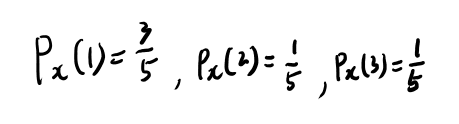

In [1]:
MeatPieImage()

T(P)は解説の通りなので別にいいだろう。

### 定理11.1.2がかっこいい！

i.i.dなXnのサンプリングした結果の出る確率は、クラスだけで決まる。まぁそれは当たり前な気がするが、結果の式11.7がかっこいい！

クラスのエントロピーとQとのKLダイバージェンスで決まってしまう！

QとのKLダイバージェンスが出にくさを表すのはほぼ明らかだろう。
クラスのエントロピーが高いとなんで良いのだろうか？

なんとなくPxのエントロピーが高いと、それを入れ替えて得られる系列が多い、という事な気がするが、それって正しいだろうか？

感覚的にはエントロピーが高いクラスというのは、それに所属している、というだけではまだ多くの不確実性を残している、という事なので、所属している系列はいっぱいありそうな気がする。

そもそもこのPxという概念はQは関係ない。

2つの要素が1/2の確率でとる場合のエントロピーよりは、4つの場合を1/4でとる場合のエントロピーが高い。
たぶん1/nをn個の場合でとるエントロピーを考えると、これはnの単調増加が示せる気がする。

やってみよう。

離散的な場合を考える。0でない確率を取る点がn個あり、それぞれの確率が1/nとする。

この時のエントロピーをHnと書く事にしよう。
H1は0。H2は1。H4は2。
面倒なので$$n=2^k$$の場合だけでいいか。

帰納法で示せそう。

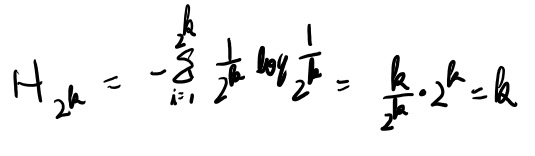

In [1]:
MeatPieImage()

あら、帰納法を使うまでも無かった。
分割の個数のlogに一致するのか。
そりゃそうか。1/nがn個だと定義から計算すれば-log1/nになるんだから。

では最大は全部のアルファベットが違う場合で、このクラスに属す場合の数はnの階乗ぶんだけある。

nが2で割り切れるとして、n/2個のアルファベットが2個ずつある場合、重複を区別するとnの階乗個で、重複は$$2^\frac{n}{2}$$個、、、かな。

これが合ってるならnの階乗を最大に、ただひたすらそれを割っていくのだから、分割個数を2で割る都度、場合の数がだんだんと減っていくのは証明出来た事になる。
2で割れない場合とかは本当は考えないといけないが、気分的には納得した。
重複するアルファベットがあればあるほどエントロピーは減り、重複の分だけnの階乗を重複カウントで割る事になるのだから場合の数も減る。

偏れば偏るほどエントロピーは減るし、偏るというのは重複アルファベットが増えるという事だから場合の数は減るんだな。納得した。

式11.7に戻ると、感覚的にはカッコの中の最初の項でそのクラスの中でxが出る確率を表し、第二項でそのクラスが出る確率を表してるようなもんか。

### Example 11.1.2

偏りがある方だけいくつか確認してみる。
まずn=24で二回ずつ出るケース。

系列としては11111111 22222222 3333 44 55を入れ替えた物となる。
この個数は、、、と計算してみたが、これは複雑になり過ぎてHの式と一致してるか確認するのは無理だな。 

証明をたどる感じで直接Qを出してみよう。

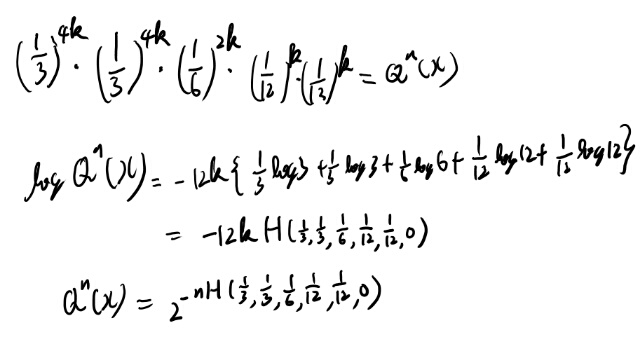

In [1]:
MeatPieImage()

お、ちゃんと出せたな。これだと具体例を考えてるありがたみがあまり無いが。

結局Qと同じ比率のアルファベットを考えると、その目の出やすさと同じだけの値が肩に乗るので、logを取るとエントロピーになる訳だよな。

これってギャンブルの時のオッズに合わせて掛けるのと同じ話か。

## 11.3 Universal  source coding

i.i.dでさえあれば、個々の分布がなんでも、そのエントロピーさえ分かればちゃんと圧縮出来るコーディングを考える事が出来る、という話。

概要としてはタイプのエントロピーが個々の分布のエントロピーより低い物だけ集めてそれを並べてコーディングすれば、この集合は確率的にはだいたいの場合をカバーしつつ要素数は少ない、という話の模様。

ここまで出てきた定理を組み合わせるだけなので、自分で示せる気はしないが新しくメモする事はあまり無い。

## 11.4 LARGE DEVIATION THEORY

開幕、ベルヌーイ分布からのi.i.dでの平均が特定の値のあたりになる確率を華麗にKLダイバージェンスで出して感動する。
なんかすごいエレガントだよなぁ。

図11.4はいまいち何をあらわしているのか分からない。どうもこのProbability simplexというのはよく理解出来てないなぁ。

ただEの中で一番Qに近いのがPスターだ、というのはわかる。

そのあとの証明も、自分で出来る気はしないが追うのはそんな難しくない。

### 11.5 Sanovの定理の例

式11.110が出せる気がしなかったので、少し手を動かしてみる事にする。

まずPの最小化問題なので11.109で-1とかマイナスアルファが無いのは良かろう。
この極小を与える関数Pを求める変分問題となってる。

離散のケースの変分法とか全然慣れてないので良く分からないから、ちゃんと計算してみる事にする。
以下の汎関数を最小にする関数Pを求めたい。

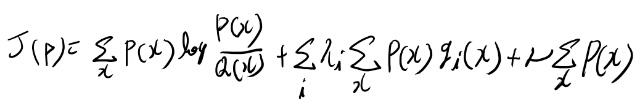

In [1]:
MeatPieImage()

任意の微小な関数、デルタPと小さいスカラ、アルファで、以下のような汎関数を考える。

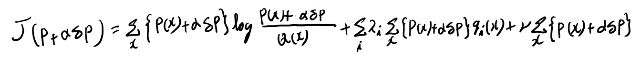

In [1]:
MeatPieImage()

これをアルファで微分してアルファにゼロを入れると変分になる。（CALUCULUS OF VARIATION 1.6参照）

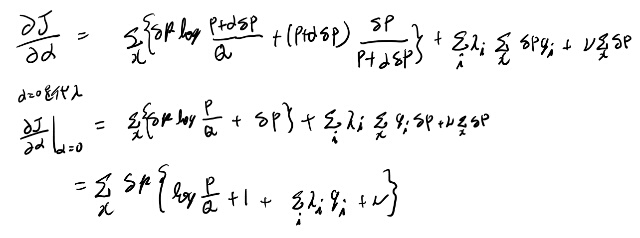

In [1]:
MeatPieImage()

これが任意のデルタPで成立する為には中括弧の中がたぶんゼロである必要があるよな。
ニューと1はxに依存しないので規格化定数に押し込めて、ラムダをマイナスにした物で定数を取り直すと11.110が出そうだ。

こういうのってなんか微分公式みたいなので11.109から機械的に出せた気がするが、そんな大変でも無いので慣れるまでは毎回やり直すくらいでいいかもしれない。

### 例11.5.1 サイコロの平均が4以上

4以上というからにはそれ以上を積分しないといけないのかと思ったら、Sanovの定理から一番近い4のKLダイバージェンスで近似出来る！

なるほど、これがSanovの定理か。すごい！

証明を読んでてもいまいち意味する所が分かってなかったなぁ。

それにしてもこれ、4以上、でも、「4以上5以下」でも全く同じ結果になるんだよね？なんか信じがたいものがあるが。

感覚的には一番Qに近い、4のあたりのクラスに確率質量のほとんどすべてが偏って存在してるって事だよな。

### Example 11.6.1の計算が分からない

変分レベルが低すぎるので計算練習しておく。
軽く計算すると、制約条件がaじゃなくてxなら成り立ちそうだった。

そもそも、Pスターの定義が良く分かってない。PとQのKLダイバージェンスを最小化するスターは、関数形であってaの値では無い気がするのだが。
Pスター(a)がKLダイバージェンスを最小化するとは？

普通に考えれば条件付き確率の条件を満たすようなPの微小な変化を考えるべきだよなぁ。
という事でこの記述は不正確なんじゃないか。

そう思うに至った計算を貼っておく（整理はしてない）

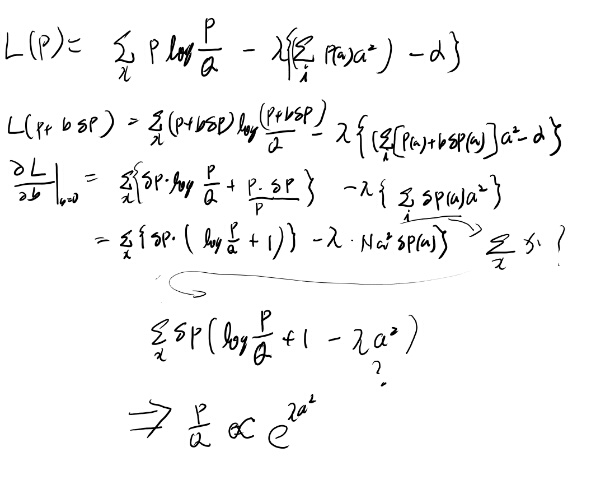

In [1]:
MeatPieImage()